<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/Catalogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones continuas
## Distribución Uniforme Continua $U \sim (0,1)$
### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & \text{si } a \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$

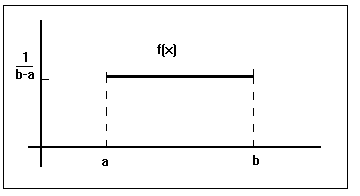

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
0, & \text{si } x < a \\
\frac{x - a}{b - a}, & \text{si } a \leq x \leq b \\
1, & \text{si } x > b
\end{cases}
$$

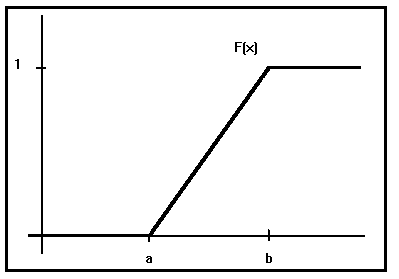

### Media

$$
\mu = \mathbb{E}[X] = \frac{a + b}{2}
$$

### Varianza

$$
\text{Var}(X) = \frac{(b - a)^2}{12}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{b - a}{\sqrt{12}}
$$

### Pseudocodigo

Entradas:

    a: límite inferior
    b: límite superior

Procedimiento:

1. Generar un número aleatorio R entre $0$ y $1$ $(R \sim U(0,1))$
2. Calcular X = a + (b - a) * R
3. Retornar X


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [ ]:
a = 2
b = 7

In [ ]:
# Teóricos
media_teo = (a + b) / 2
var_teo = (b - a)**2 / 12
std_teo = np.sqrt(var_teo)

In [ ]:
def simular_uniforme(n):
  lista = []
  for _ in range(n):
    R = random()
    x = a + (b - a) * R
    lista.append(x)
  return lista

In [ ]:
k = 100000

# Llamada a la función
d = simular_uniforme(k)

In [ ]:
media_emp = np.mean(d)
var_emp = np.var(d)
std_emp = np.std(d)

In [ ]:
# Imprimir resultados
print(f"Intervalo: [{a}, {b}] con {k} simulaciones")
print(f"Media teórica: {media_teo:.4f} | Empírica: {media_emp:.4f}")
print(f"Varianza teórica: {var_teo:.4f} | Empírica: {var_emp:.4f}")
print(f"Desviación estándar teórica: {std_teo:.4f} | Empírica: {std_emp:.4f}")
print("")

Intervalo: [2, 7] con 100000 simulaciones
Media teórica: 4.5000 | Empírica: 4.4932
Varianza teórica: 2.0833 | Empírica: 2.0773
Desviación estándar teórica: 1.4434 | Empírica: 1.4413



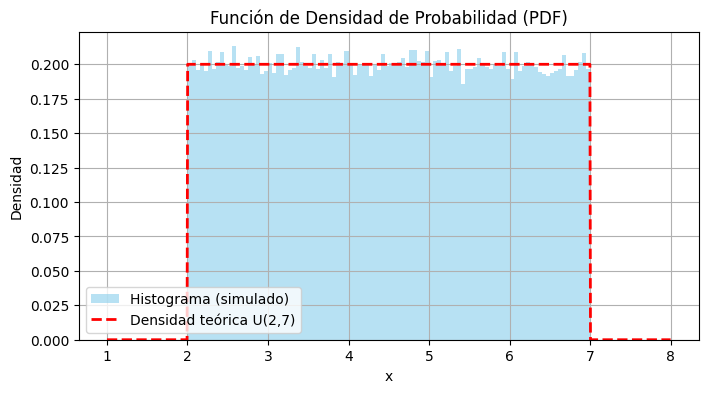

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x = np.linspace(a - 1, b + 1, 1000)
pdf = np.where((x >= a) & (x <= b), 1 / (b - a), 0)

plt.figure(figsize=(8, 4))
plt.hist(d, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='skyblue')
plt.plot(x, pdf, 'r--', label=f'Densidad teórica U({a},{b})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

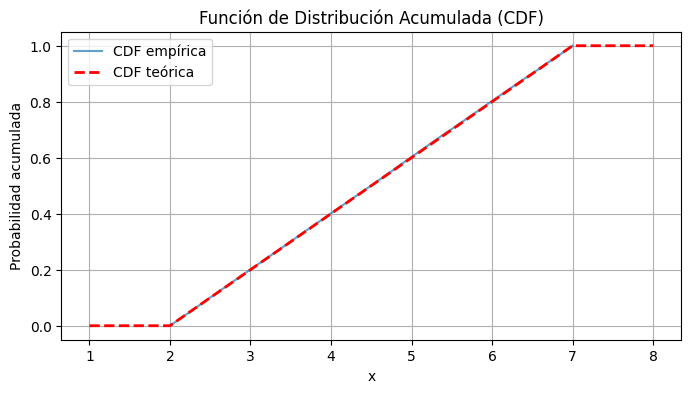

In [ ]:
# === GRAFICAR FUNCION ACUMULADA ===
# Ordenar datos simulados para aproximar CDF empírica
d_sorted = np.sort(d)
y_cdf = np.arange(1, k + 1) / k

# CDF teórica
def cdf_uniforme(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))

x_vals = np.linspace(a - 1, b + 1, 1000)
cdf_teo = cdf_uniforme(x_vals, a, b)

plt.figure(figsize=(8, 4))
plt.plot(d_sorted, y_cdf, label='CDF empírica', alpha=0.7)
plt.plot(x_vals, cdf_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF)')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Triangular
## $X \sim Triangular(a,b,c)$

###Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
0, & x < a \\
\frac{2(x - a)}{(b - a)(c - a)}, & a \le x < c \\
\frac{2(b - x)}{(b - a)(b - c)}, & c \le x \le b \\
0, & x > b
\end{cases}
$$



### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{(x - a)^2}{(b - a)(c - a)}, & a \le x < c \\
1 - \frac{(b - x)^2}{(b - a)(b - c)}, & c \le x \le b \\
1, & x > b
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{a + b + c}{3}
$$

### Varianza

$$
\text{Var}(X) = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)}
$$

### Pseudocódigo para simular una variable aleatoria Triangular$(a, b, c)$

Entradas:

    a: límite inferior
    b: límite superior
    c: modo (a < c < b)

Procedimiento:

1. Generar un número aleatorio $U \sim Uniforme(0, 1)$

2. Calcular $F_c =\frac{c - a}{b - a}$

3. Si $U < F_c$ entonces:

    $X = a + \sqrt{U * (b - a) * (c - a)}$

  En otro caso:

    $X = b - \sqrt{(1 - U) * (b - a) * (b - c)}$

4. Retornar $X$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import sqrt

In [ ]:
# Parámetros de la distribución triangular
tri_a = 2
tri_b = 7
tri_c = 5

In [ ]:
# Teóricos
tri_media_teo = (tri_a + tri_b + tri_c) / 3
tri_var_teo = (tri_a**2 + tri_b**2 + tri_c**2 - tri_a*tri_b - tri_a*tri_c - tri_b*tri_c) / 18
tri_std_teo = np.sqrt(tri_var_teo)

In [ ]:
# Función para simular la distribución triangular
def simular_triangular(n):
    muestras_tri = []
    F_c = (tri_c - tri_a) / (tri_b - tri_a)
    for _ in range(n):
        R = random()
        if R < F_c:
            x_tri = tri_a + sqrt(R * (tri_b - tri_a) * (tri_c - tri_a))
        else:
            x_tri = tri_b - sqrt((1 - R) * (tri_b - tri_a) * (tri_b - tri_c))
        muestras_tri.append(x_tri)
    return muestras_tri

In [ ]:
# Simulación
tri_k = 100000
tri_muestras = simular_triangular(tri_k)

In [ ]:
# Estadísticas empíricas
tri_media_emp = np.mean(tri_muestras)
tri_var_emp = np.var(tri_muestras)
tri_std_emp = np.std(tri_muestras)

In [ ]:
# Imprimir resultados
print(f"Intervalo: [{tri_a}, {tri_b}] con modo {tri_c} y {tri_k} simulaciones")
print(f"Media teórica: {tri_media_teo:.4f} | Empírica: {tri_media_emp:.4f}")
print(f"Varianza teórica: {tri_var_teo:.4f} | Empírica: {tri_var_emp:.4f}")
print(f"Desviación estándar teórica: {tri_std_teo:.4f} | Empírica: {tri_std_emp:.4f}")
print("")

Intervalo: [2, 7] con modo 5 y 100000 simulaciones
Media teórica: 4.6667 | Empírica: 4.6650
Varianza teórica: 1.0556 | Empírica: 1.0550
Desviación estándar teórica: 1.0274 | Empírica: 1.0271



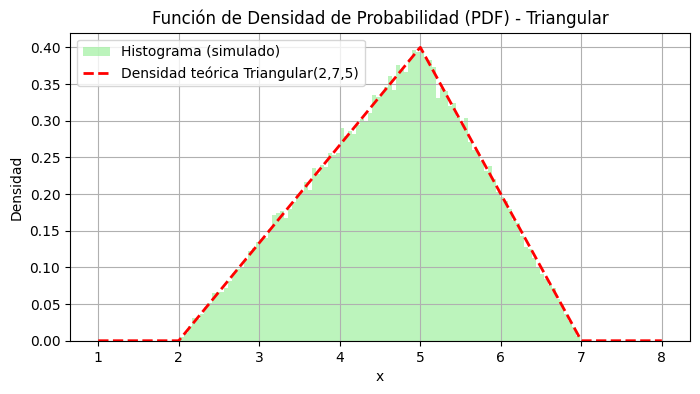

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_tri_vals = np.linspace(tri_a - 1, tri_b + 1, 1000)
pdf_tri = np.piecewise(x_tri_vals,
    [x_tri_vals < tri_a,
     (x_tri_vals >= tri_a) & (x_tri_vals < tri_c),
     (x_tri_vals >= tri_c) & (x_tri_vals <= tri_b),
     x_tri_vals > tri_b],
    [0,
     lambda x: 2 * (x - tri_a) / ((tri_b - tri_a) * (tri_c - tri_a)),
     lambda x: 2 * (tri_b - x) / ((tri_b - tri_a) * (tri_b - tri_c)),
     0])

plt.figure(figsize=(8, 4))
plt.hist(tri_muestras, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='lightgreen')
plt.plot(x_tri_vals, pdf_tri, 'r--', label=f'Densidad teórica Triangular({tri_a},{tri_b},{tri_c})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Triangular')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

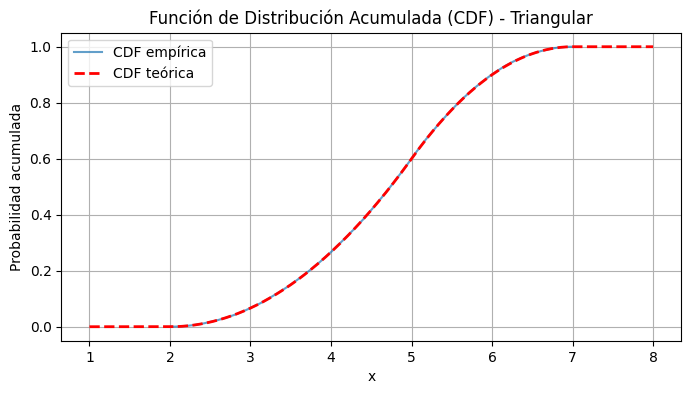

In [ ]:
# === GRAFICAR FUNCION ACUMULADA ===
tri_muestras_ordenadas = np.sort(tri_muestras)
tri_cdf_emp = np.arange(1, tri_k + 1) / tri_k

def cdf_triangular(x, a, b, c):
    return np.piecewise(x,
        [x < a,
         (x >= a) & (x < c),
         (x >= c) & (x <= b),
         x > b],
        [0,
         lambda x: ((x - a) ** 2) / ((b - a) * (c - a)),
         lambda x: 1 - ((b - x) ** 2) / ((b - a) * (b - c)),
         1])

x_tri_vals_cdf = np.linspace(tri_a - 1, tri_b + 1, 1000)
cdf_tri_teo = cdf_triangular(x_tri_vals_cdf, tri_a, tri_b, tri_c)

plt.figure(figsize=(8, 4))
plt.plot(tri_muestras_ordenadas, tri_cdf_emp, label='CDF empírica', alpha=0.7)
plt.plot(x_tri_vals_cdf, cdf_tri_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Triangular')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Exponencial $X \sim Exp(\lambda)$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
1 - e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{1}{\lambda}
$$

### Varianza

$$
\text{Var}(X) = \frac{1}{\lambda^2}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{1}{\lambda}
$$

### Pseudocódigo para simular una variable aleatoria Exponencial $(\lambda)$


Entrada:

    λ: parámetro de tasa (λ > 0) tasa de ocurrencia del evento (eventos por unidad de tiempo)

Procedimiento:
    
1. Generar un número aleatorio U ~ Uniforme(0, 1)

2. Calcular $X = -\frac {1}{λ} * ln(1 - U)$
    
3. Retornar $X$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log

In [ ]:
# Parámetro de la distribución exponencial
lmbda = 1.5  # tasa λ > 0

# Valores teóricos
exp_media_teo = 1 / lmbda
exp_var_teo = 1 / lmbda**2
exp_std_teo = np.sqrt(exp_var_teo)

In [ ]:
# Función para simular la distribución exponencial con la transformada inversa
def simular_exponencial(n):
    lista_exp = []
    for _ in range(n):
        U = random()
        x_exp = -log(U) / lmbda
        lista_exp.append(x_exp)
    return lista_exp

In [ ]:
# Número de simulaciones
k_exp = 100000

# Llamada a la función
datos_exp = simular_exponencial(k_exp)

In [ ]:
# Estadísticas empíricas
exp_media_emp = np.mean(datos_exp)
exp_var_emp = np.var(datos_exp)
exp_std_emp = np.std(datos_exp)

In [ ]:
# Imprimir resultados
print(f"Distribución Exponencial con λ = {lmbda} y {k_exp} simulaciones")
print(f"Media teórica: {exp_media_teo:.4f} | Empírica: {exp_media_emp:.4f}")
print(f"Varianza teórica: {exp_var_teo:.4f} | Empírica: {exp_var_emp:.4f}")
print(f"Desviación estándar teórica: {exp_std_teo:.4f} | Empírica: {exp_std_emp:.4f}")
print("")

Distribución Exponencial con λ = 1.5 y 100000 simulaciones
Media teórica: 0.6667 | Empírica: 0.6686
Varianza teórica: 0.4444 | Empírica: 0.4426
Desviación estándar teórica: 0.6667 | Empírica: 0.6652



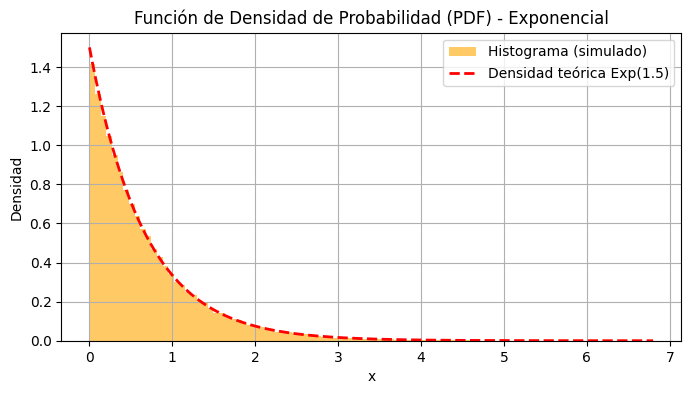

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_exp_vals = np.linspace(0, max(datos_exp), 1000)
pdf_exp = lmbda * np.exp(-lmbda * x_exp_vals)

plt.figure(figsize=(8, 4))
plt.hist(datos_exp, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='orange')
plt.plot(x_exp_vals, pdf_exp, 'r--', label=f'Densidad teórica Exp({lmbda})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Exponencial')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

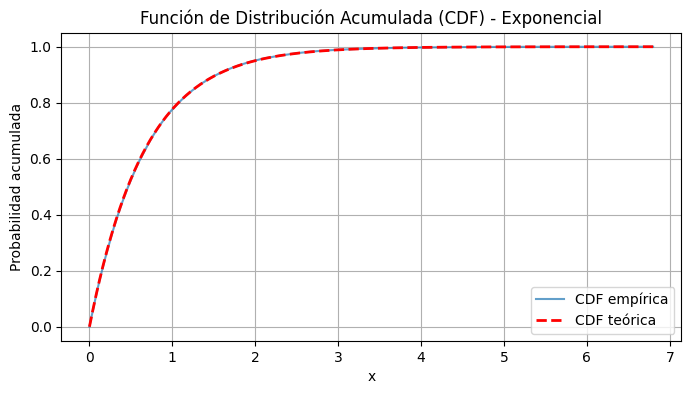

In [ ]:
# === GRAFICAR FUNCION ACUMULADA ===
datos_exp_ordenados = np.sort(datos_exp)
y_cdf_exp = np.arange(1, k_exp + 1) / k_exp

def cdf_exponencial(x, lam):
    return np.where(x < 0, 0, 1 - np.exp(-lam * x))

x_cdf_exp = np.linspace(0, max(datos_exp), 1000)
cdf_exp_teo = cdf_exponencial(x_cdf_exp, lmbda)

plt.figure(figsize=(8, 4))
plt.plot(datos_exp_ordenados, y_cdf_exp, label='CDF empírica', alpha=0.7)
plt.plot(x_cdf_exp, cdf_exp_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Exponencial')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución m-Erlang
## $X \sim Erlang(m,\lambda)$

### Definición:  
La distribución m-Erlang es un caso particular de la distribución Gamma, en donde el parámetro de forma $k = m$ es un entero positivo. Es utilizada para modelar el tiempo hasta la ocurrencia del $m$-ésimo evento en un proceso de Poisson con tasa $\lambda$.

### Notación:
$$
X \sim \text{Erlang}(m, \lambda)
\quad \text{donde } m \in \mathbb{N},\ \lambda > 0
$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\dfrac{\lambda^m x^{m - 1} e^{-\lambda x}}{(m - 1)!}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
1 - \sum\limits_{k=0}^{m-1} \dfrac{(\lambda x)^k e^{-\lambda x}}{k!}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{m}{\lambda}
$$

### Varianza

$$
\text{Var}(X) = \frac{m}{\lambda^2}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{\sqrt{m}}{\lambda}
$$

### Pseudocódigo para simular una variable aleatoria Erlang $(m, \lambda)$

Entradas:

    m: número de etapas (entero positivo)
    λ: tasa del proceso (λ > 0)

Procedimiento:

1. Inicializar $X = 0$

2. Para $i = 1$ hasta $m$ hacer:

    a. Generar $U \sim Uniforme(0, 1)$

    b. Calcular $E = - \frac{ln(U)}{λ}$

    c. Acumular: $X ← X + E$
3. Retornar $X$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log, factorial

In [ ]:
# Parámetros de la distribución Erlang
erlang_m = 4       # número de etapas
erlang_lambda = 1.2  # tasa λ > 0

In [ ]:
# Teóricos
erlang_media_teo = erlang_m / erlang_lambda
erlang_var_teo = erlang_m / (erlang_lambda ** 2)
erlang_std_teo = np.sqrt(erlang_var_teo)

In [ ]:
# Función para simular la distribución m-Erlang
def simular_erlang(n):
    lista_erlang = []
    for _ in range(n):
        x_erl = 0
        for _ in range(erlang_m):
            U = random()
            x_erl += -log(U) / erlang_lambda
        lista_erlang.append(x_erl)
    return lista_erlang

In [ ]:
# Número de simulaciones
k_erlang = 100000

# Llamada a la función
datos_erlang = simular_erlang(k_erlang)

In [ ]:
# Estadísticas empíricas
erlang_media_emp = np.mean(datos_erlang)
erlang_var_emp = np.var(datos_erlang)
erlang_std_emp = np.std(datos_erlang)

In [ ]:
# Imprimir resultados
print(f"Distribución Erlang con m = {erlang_m}, λ = {erlang_lambda}, simulaciones: {k_erlang}")
print(f"Media teórica: {erlang_media_teo:.4f} | Empírica: {erlang_media_emp:.4f}")
print(f"Varianza teórica: {erlang_var_teo:.4f} | Empírica: {erlang_var_emp:.4f}")
print(f"Desviación estándar teórica: {erlang_std_teo:.4f} | Empírica: {erlang_std_emp:.4f}")
print("")

Distribución Erlang con m = 4, λ = 1.2, simulaciones: 100000
Media teórica: 3.3333 | Empírica: 3.3241
Varianza teórica: 2.7778 | Empírica: 2.7542
Desviación estándar teórica: 1.6667 | Empírica: 1.6596



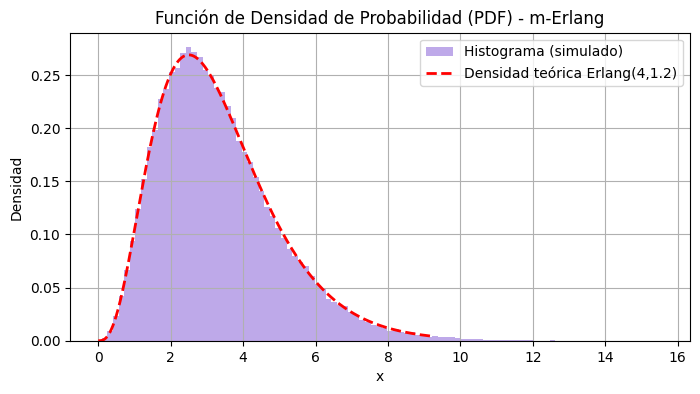

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_erl = np.linspace(0, np.percentile(datos_erlang, 99.5), 1000)
pdf_erlang = (erlang_lambda**erlang_m) * (x_erl**(erlang_m - 1)) * np.exp(-erlang_lambda * x_erl) / factorial(erlang_m - 1)

plt.figure(figsize=(8, 4))
plt.hist(datos_erlang, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='mediumpurple')
plt.plot(x_erl, pdf_erlang, 'r--', label=f'Densidad teórica Erlang({erlang_m},{erlang_lambda})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - m-Erlang')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

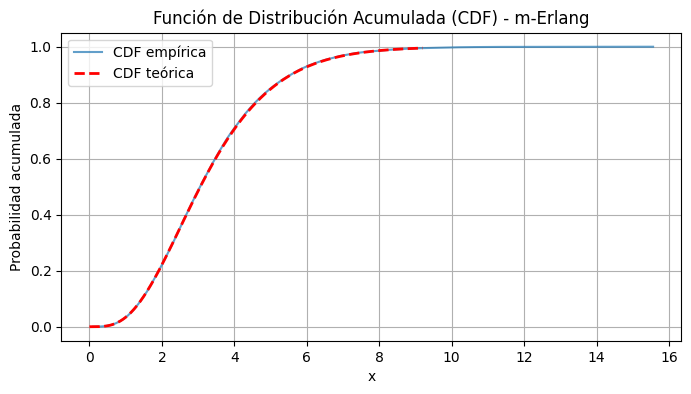

In [ ]:
# === GRAFICAR FUNCION ACUMULADA ===
datos_erl_ordenados = np.sort(datos_erlang)
y_cdf_erl = np.arange(1, k_erlang + 1) / k_erlang

def cdf_erlang(x, m, lmb):
    # Suma de términos de la CDF teórica
    cdf = np.zeros_like(x)
    for k in range(m):
        cdf += ((lmb * x) ** k) / factorial(k)
    return 1 - np.exp(-lmb * x) * cdf

x_vals_erl = np.linspace(0, np.percentile(datos_erlang, 99.5), 1000)
cdf_teo_erl = cdf_erlang(x_vals_erl, erlang_m, erlang_lambda)

plt.figure(figsize=(8, 4))
plt.plot(datos_erl_ordenados, y_cdf_erl, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_erl, cdf_teo_erl, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - m-Erlang')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Gamma $X \sim \Gamma (\alpha, \lambda)$

### Definición:  
La distribución Gamma es una distribución continua que generaliza la distribución Erlang. Se define mediante dos parámetros positivos: $ \alpha$ (forma) y $\lambda$ (tasa). Es usada para modelar el tiempo hasta que ocurren $\alpha$ eventos en un proceso de Poisson (donde $ \alpha$ no necesariamente es entero).

### Notación:  
$$
X \sim \text{Gamma}(\alpha, \lambda)
\quad \text{con } \alpha > 0, \ \lambda > 0
$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\dfrac{\lambda^\alpha x^{\alpha - 1} e^{-\lambda x}}{\Gamma(\alpha)}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

donde $\Gamma(\alpha)$ es la función gamma:
$$
\Gamma(\alpha) = \int_0^\infty t^{\alpha - 1} e^{-t} dt
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
\dfrac{1}{\Gamma(\alpha)} \int_0^{\lambda x} t^{\alpha - 1} e^{-t} dt = \dfrac{\gamma(\alpha, \lambda x)}{\Gamma(\alpha)}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

donde $\gamma(\alpha, z)$ es la función gamma incompleta inferior:
$$
\gamma(\alpha, z) = \int_0^z t^{\alpha - 1} e^{-t} dt
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{\alpha}{\lambda}
$$

### Varianza

$$
\text{Var}(X) = \frac{\alpha}{\lambda^2}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{\sqrt{\alpha}}{\lambda}
$$

### Pseudocódigo para simular una variable Gamma $(\alpha, \lambda)$ con $\alpha$ entero positivo

Entradas:

    α: parámetro de forma (entero positivo)
    λ: parámetro de tasa (λ > 0)

Procedimiento:

1. Inicializar $X = 0$

2. Para i = 1 hasta α hacer:

    a. Generar $U \sim Uniforme(0, 1)$
    
    b. Calcular $E = -\frac{ln(U)}{λ}$
    
    c. Acumular: $X ← X + E$
3. Retornar $X$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log, gamma

In [ ]:
# Parámetros de la distribución Gamma
gamma_alpha = 5     # parámetro de forma (entero)
gamma_lambda = 1.0  # parámetro de tasa

In [ ]:
# Cálculo teórico
gamma_media_teo = gamma_alpha / gamma_lambda
gamma_var_teo = gamma_alpha / (gamma_lambda**2)
gamma_std_teo = np.sqrt(gamma_var_teo)

In [ ]:
# Simulación usando suma de exponenciales
def simular_gamma(n):
    muestras_gamma = []
    for _ in range(n):
        x_gamma = 0
        for _ in range(gamma_alpha):
            U = random()
            x_gamma += -log(U) / gamma_lambda
        muestras_gamma.append(x_gamma)
    return muestras_gamma

In [ ]:
# Número de simulaciones
k_gamma = 100000

# Llamada a la función
datos_gamma = simular_gamma(k_gamma)

In [ ]:
# Estadísticas empíricas
gamma_media_emp = np.mean(datos_gamma)
gamma_var_emp = np.var(datos_gamma)
gamma_std_emp = np.std(datos_gamma)

In [ ]:
# Imprimir resultados
print(f"Distribución Gamma con α = {gamma_alpha}, λ = {gamma_lambda}, simulaciones: {k_gamma}")
print(f"Media teórica: {gamma_media_teo:.4f} | Empírica: {gamma_media_emp:.4f}")
print(f"Varianza teórica: {gamma_var_teo:.4f} | Empírica: {gamma_var_emp:.4f}")
print(f"Desviación estándar teórica: {gamma_std_teo:.4f} | Empírica: {gamma_std_emp:.4f}")
print("")

Distribución Gamma con α = 5, λ = 1.0, simulaciones: 100000
Media teórica: 5.0000 | Empírica: 4.9949
Varianza teórica: 5.0000 | Empírica: 4.9144
Desviación estándar teórica: 2.2361 | Empírica: 2.2168



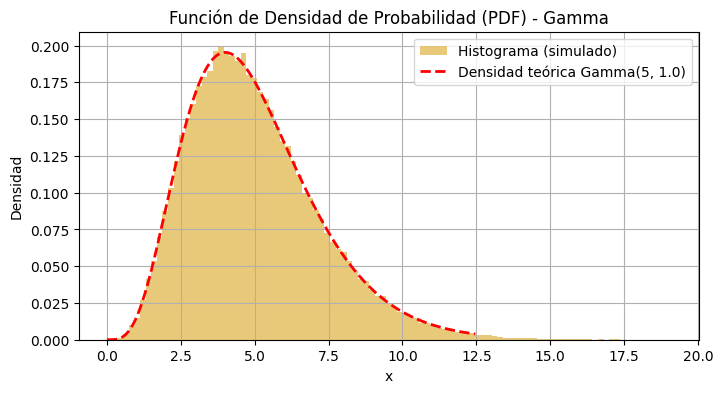

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_gamma_vals = np.linspace(0, np.percentile(datos_gamma, 99.5), 1000)
pdf_gamma = (gamma_lambda**gamma_alpha) * (x_gamma_vals**(gamma_alpha - 1)) * \
            np.exp(-gamma_lambda * x_gamma_vals) / gamma(gamma_alpha)

plt.figure(figsize=(8, 4))
plt.hist(datos_gamma, bins=100, density=True, alpha=0.6, label='Histograma (simulado)', color='goldenrod')
plt.plot(x_gamma_vals, pdf_gamma, 'r--', label=f'Densidad teórica Gamma({gamma_alpha}, {gamma_lambda})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Gamma')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

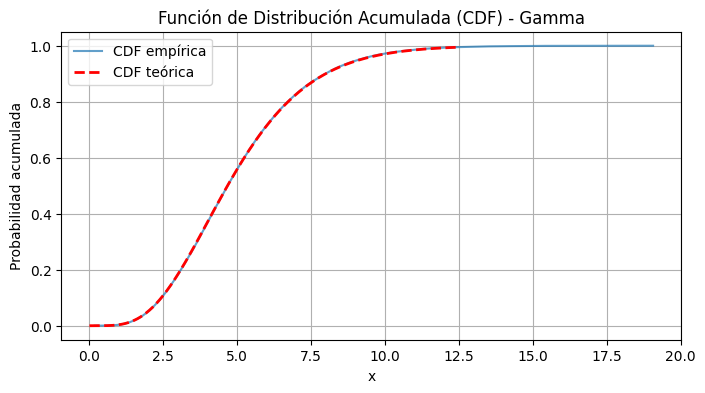

In [ ]:
# === GRAFICAR FUNCION ACUMULADA ===
datos_gamma_ordenados = np.sort(datos_gamma)
y_cdf_gamma = np.arange(1, k_gamma + 1) / k_gamma

from scipy.special import gammainc

def cdf_gamma(x, alpha, lambd):
    return gammainc(alpha, lambd * x)

x_vals_gamma = np.linspace(0, np.percentile(datos_gamma, 99.5), 1000)
cdf_gamma_teo = cdf_gamma(x_vals_gamma, gamma_alpha, gamma_lambda)

plt.figure(figsize=(8, 4))
plt.plot(datos_gamma_ordenados, y_cdf_gamma, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_gamma, cdf_gamma_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Gamma')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Weibull $$

### Definición:
La distribución Weibull es una distribución continua que se usa frecuentemente en análisis de confiabilidad y vida útil de productos. Está definida por dos parámetros positivos: $\lambda > 0$ (escala) y $k > 0$ (forma).

### Notación:  
$$
X \sim \text{Weibull}(k, \lambda)
$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k - 1} e^{-(x / \lambda)^k}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
1 - e^{-(x / \lambda)^k}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \lambda \, \Gamma\left(1 + \frac{1}{k}\right)
$$

### Varianza

$$
\text{Var}(X) = \lambda^2 \left[ \Gamma\left(1 + \frac{2}{k}\right) - \left(\Gamma\left(1 + \frac{1}{k}\right)\right)^2 \right]
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)}
$$

donde $\Gamma(\cdot)$ es la función Gamma de Euler.

### Pseudocódigo para simular una variable Weibull $(k, \lambda)$

Entradas:

    k: parámetro de forma (k > 0)

    λ: parámetro de escala (λ > 0)

Procedimiento:

1. Generar $U \sim Uniforme(0, 1)$

2. Calcular $X = \lambda * [ -ln(1 - U) ]^{\frac{1}{k}}$

3. Retornar $X$


Distribución Weibull con k = 1.5, λ = 2.0, simulaciones: 100000
Media teórica: 1.8055 | Empírica: 1.8062
Varianza teórica: 1.5028 | Empírica: 1.5005
Desviación estándar teórica: 1.2259 | Empírica: 1.2250



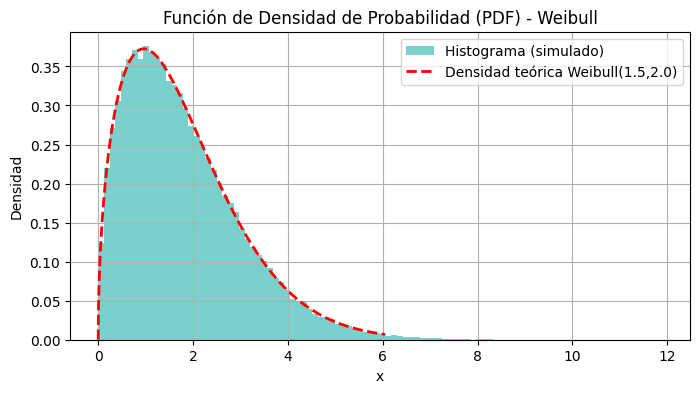

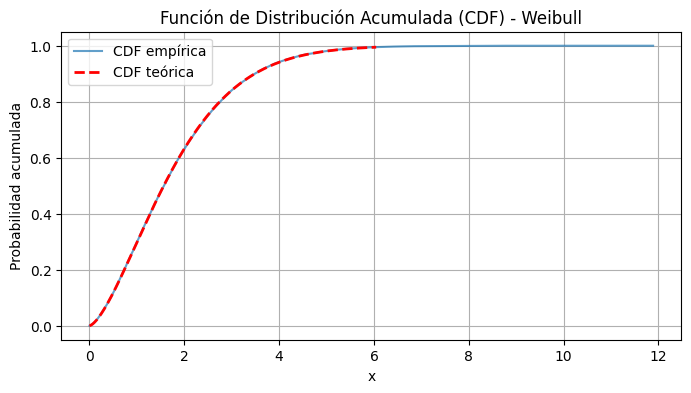

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log, gamma

# Parámetros de la distribución Weibull
weib_k = 1.5      # parámetro de forma (k > 0)
weib_lambda = 2.0  # parámetro de escala (λ > 0)

# Valores teóricos
weib_media_teo = weib_lambda * gamma(1 + 1 / weib_k)
weib_var_teo = weib_lambda**2 * (gamma(1 + 2 / weib_k) - (gamma(1 + 1 / weib_k))**2)
weib_std_teo = np.sqrt(weib_var_teo)

# Simulación con la transformada inversa
def simular_weibull(n):
    lista_weib = []
    for _ in range(n):
        U = random()
        x_weib = weib_lambda * (-log(U))**(1 / weib_k)
        lista_weib.append(x_weib)
    return lista_weib

# Número de simulaciones
k_weibull = 100000

# Llamada a la función
datos_weib = simular_weibull(k_weibull)

# Estadísticas empíricas
weib_media_emp = np.mean(datos_weib)
weib_var_emp = np.var(datos_weib)
weib_std_emp = np.std(datos_weib)

# Imprimir resultados
print(f"Distribución Weibull con k = {weib_k}, λ = {weib_lambda}, simulaciones: {k_weibull}")
print(f"Media teórica: {weib_media_teo:.4f} | Empírica: {weib_media_emp:.4f}")
print(f"Varianza teórica: {weib_var_teo:.4f} | Empírica: {weib_var_emp:.4f}")
print(f"Desviación estándar teórica: {weib_std_teo:.4f} | Empírica: {weib_std_emp:.4f}")
print("")

# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_weib = np.linspace(0, np.percentile(datos_weib, 99.5), 1000)
pdf_weib = (weib_k / weib_lambda) * (x_weib / weib_lambda)**(weib_k - 1) * np.exp(-(x_weib / weib_lambda)**weib_k)

plt.figure(figsize=(8, 4))
plt.hist(datos_weib, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='lightseagreen')
plt.plot(x_weib, pdf_weib, 'r--', label=f'Densidad teórica Weibull({weib_k},{weib_lambda})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Weibull')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_weib_ordenados = np.sort(datos_weib)
y_cdf_weib = np.arange(1, k_weibull + 1) / k_weibull

def cdf_weibull(x, k, lam):
    return 1 - np.exp(-(x / lam) ** k)

x_vals_weib = np.linspace(0, np.percentile(datos_weib, 99.5), 1000)
cdf_weib_teo = cdf_weibull(x_vals_weib, weib_k, weib_lambda)

plt.figure(figsize=(8, 4))
plt.plot(datos_weib_ordenados, y_cdf_weib, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_weib, cdf_weib_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Weibull')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()


## Distribución Normal

### Definición:  
La distribución normal es una distribución continua simétrica en forma de campana, utilizada ampliamente en estadística para modelar fenómenos naturales. Se define por dos parámetros: la media $\mu$ y la desviación estándar $\sigma$.

### Notación:  
$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right), \quad x \in \mathbb{R}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) = \frac{1}{\sigma \sqrt{2\pi}} \int_{-\infty}^{x} \exp\left( -\frac{(t - \mu)^2}{2\sigma^2} \right) dt
$$

*Nota:* No tiene una forma cerrada en términos de funciones elementales. Se evalúa numéricamente o con funciones especiales como la función error:
$$
F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$

### Media

$$
\mu = \mathbb{E}[X]
$$

### Varianza

$$
\text{Var}(X) = \sigma^2
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)}
$$

### Pseudocódigo para simular una variable Normal $(\mu, \sigma^2)$ (método Box-Muller)

Entradas:

    μ: media
    σ: desviación estándar

Procedimiento:

 1. Generar dos variables aleatorias independientes $U_1$ y $U_2$ $ \sim  Uniforme(0, 1)$

2. Calcular:
    
    $Z = \sqrt{-2 * ln(U_1)} * cos(2 * \pi * U_2)$

3. Transformar:
    $X = \mu + \sigma * Z$

4. Retornar $X$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import sqrt, log, pi, cos
from scipy.special import erf  # ✅ versión compatible con arrays

In [ ]:
# Parámetros de la distribución normal
norm_mu = 5       # media
norm_sigma = 1.5  # desviación estándar

In [ ]:
# Valores teóricos
norm_media_teo = norm_mu
norm_var_teo = norm_sigma**2
norm_std_teo = norm_sigma

In [ ]:
# Simulación usando el método de Box-Muller
def simular_normal(n):
    muestras_norm = []
    for _ in range(n):
        U1 = random()
        U2 = random()
        Z = sqrt(-2 * log(U1)) * cos(2 * pi * U2)
        X = norm_mu + norm_sigma * Z
        muestras_norm.append(X)
    return muestras_norm

In [ ]:
# Número de simulaciones
k_norm = 100000

# Llamada a la función
datos_norm = simular_normal(k_norm)

In [ ]:
# Estadísticas empíricas
norm_media_emp = np.mean(datos_norm)
norm_var_emp = np.var(datos_norm)
norm_std_emp = np.std(datos_norm)

In [ ]:
# Imprimir resultados
print(f"Distribución Normal con μ = {norm_mu}, σ = {norm_sigma}, simulaciones: {k_norm}")
print(f"Media teórica: {norm_media_teo:.4f} | Empírica: {norm_media_emp:.4f}")
print(f"Varianza teórica: {norm_var_teo:.4f} | Empírica: {norm_var_emp:.4f}")
print(f"Desviación estándar teórica: {norm_std_teo:.4f} | Empírica: {norm_std_emp:.4f}")
print("")

Distribución Normal con μ = 5, σ = 1.5, simulaciones: 100000
Media teórica: 5.0000 | Empírica: 4.9953
Varianza teórica: 2.2500 | Empírica: 2.2371
Desviación estándar teórica: 1.5000 | Empírica: 1.4957



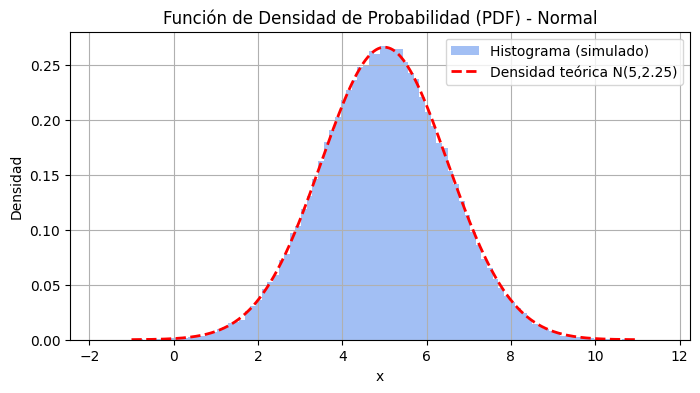

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_norm_vals = np.linspace(norm_mu - 4*norm_sigma, norm_mu + 4*norm_sigma, 1000)
pdf_norm = (1 / (norm_sigma * sqrt(2 * pi))) * np.exp(-0.5 * ((x_norm_vals - norm_mu) / norm_sigma)**2)

plt.figure(figsize=(8, 4))
plt.hist(datos_norm, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='cornflowerblue')
plt.plot(x_norm_vals, pdf_norm, 'r--', label=f'Densidad teórica N({norm_mu},{norm_sigma**2})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Normal')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

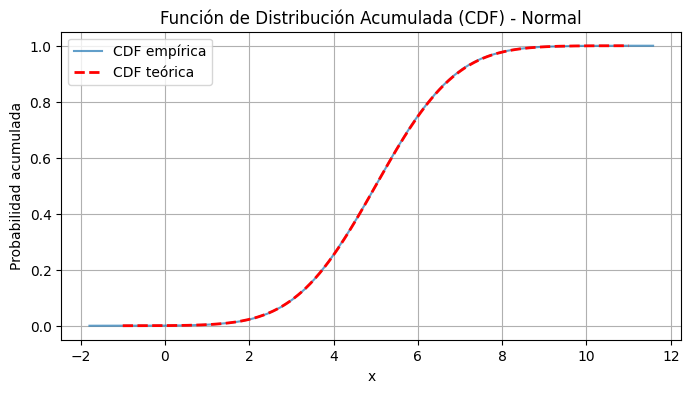

In [ ]:
# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_norm_ordenados = np.sort(datos_norm)
y_cdf_norm = np.arange(1, k_norm + 1) / k_norm

def cdf_normal(x, mu, sigma):
    return 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))

x_vals_norm = np.linspace(norm_mu - 4*norm_sigma, norm_mu + 4*norm_sigma, 1000)
cdf_norm_teo = cdf_normal(x_vals_norm, norm_mu, norm_sigma)

plt.figure(figsize=(8, 4))
plt.plot(datos_norm_ordenados, y_cdf_norm, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_norm, cdf_norm_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Normal')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Log-normal

### Definición:
Una variable aleatoria $X$ sigue una distribución log-normal si su logaritmo natural $Y = \ln(X)$ sigue una distribución normal. Está definida solo para valores positivos y es usada en modelos de crecimiento multiplicativo, tiempos de espera y finanzas.

### Notación:  
$$
X \sim \text{LogNormal}(\mu, \sigma^2)
\quad \text{con } X > 0, \ \mu \in \mathbb{R}, \ \sigma > 0
$$
donde $\mu$ y $\sigma$ son los parámetros de la distribución normal asociada a
$$Y = \ln(X) \sim \mathcal{N}(\mu, \sigma^2)$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\frac{1}{x \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right), & x > 0 \\
0, & x \leq 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
\frac{1}{2} \left[ 1 + \text{erf} \left( \frac{\ln x - \mu}{\sigma \sqrt{2}} \right) \right], & x > 0 \\
0, & x \leq 0
\end{cases}
$$

### Media

$$
\mathbb{E}[X] = e^{\mu + \frac{\sigma^2}{2}}
$$

### Varianza

$$
\text{Var}(X) = \left( e^{\sigma^2} - 1 \right) e^{2\mu + \sigma^2}
$$

### Desviación Estándar

$$
\sigma_X = \sqrt{Var(X)} = e^{\mu + \frac{\sigma^2}{2}}* \sqrt{e^{\sigma^2} - 1}
$$

### Pseudocódigo para simular una variable Log-normal $(\mu, \sigma^2)$


Entradas:
    μ: media de la normal asociada
    σ: desviación estándar de la normal asociada

Procedimiento:

1. Generar dos números $U_1, U_2 \sim Uniforme(0, 1)$
2. Calcular:
$$Z = \sqrt{-2 * ln(U_1)} * cos(2 * \pi * U_2)$$
3. Obtener $Y = \mu + \sigma * Z$
4. Calcular $X = exp(Y)$
5. Retornar $X$



Distribución Log-normal con μ = 1.0, σ = 0.6, simulaciones: 100000
Media teórica: 3.2544 | Empírica: 3.2677
Varianza teórica: 4.5894 | Empírica: 4.7308
Desviación estándar teórica: 2.1423 | Empírica: 2.1750



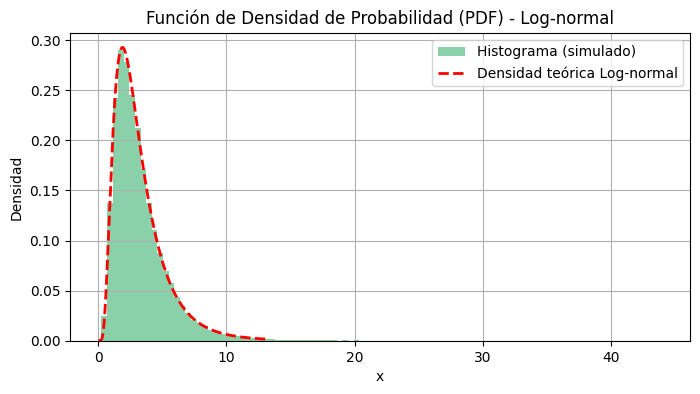

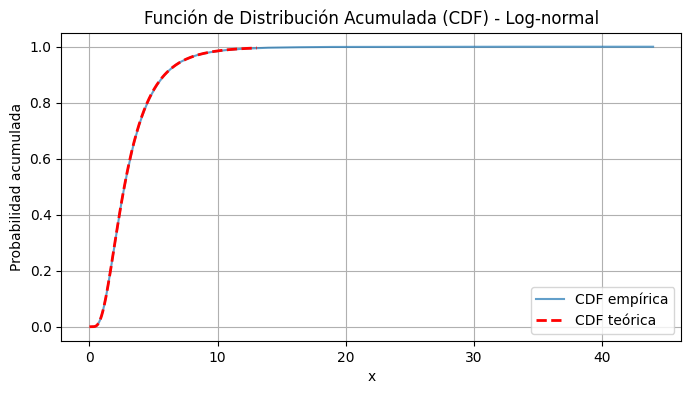

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log, sqrt, pi, cos, exp
from scipy.special import erf

# Parámetros de la distribución Log-normal
logn_mu = 1.0        # media de la normal asociada
logn_sigma = 0.6     # desviación estándar de la normal asociada

# Cálculos teóricos
logn_media_teo = exp(logn_mu + (logn_sigma**2) / 2)
logn_var_teo = (exp(logn_sigma**2) - 1) * exp(2 * logn_mu + logn_sigma**2)
logn_std_teo = sqrt(logn_var_teo)

# Simulación con método: Box-Muller + exponenciación
def simular_lognormal(n):
    lista_logn = []
    for _ in range(n):
        U1 = random()
        U2 = random()
        Z = sqrt(-2 * log(U1)) * cos(2 * pi * U2)
        Y = logn_mu + logn_sigma * Z
        X = exp(Y)
        lista_logn.append(X)
    return lista_logn

# Número de simulaciones
k_logn = 100000

# Llamada a la función
datos_logn = simular_lognormal(k_logn)

# Estadísticas empíricas
logn_media_emp = np.mean(datos_logn)
logn_var_emp = np.var(datos_logn)
logn_std_emp = np.std(datos_logn)

# Imprimir resultados
print(f"Distribución Log-normal con μ = {logn_mu}, σ = {logn_sigma}, simulaciones: {k_logn}")
print(f"Media teórica: {logn_media_teo:.4f} | Empírica: {logn_media_emp:.4f}")
print(f"Varianza teórica: {logn_var_teo:.4f} | Empírica: {logn_var_emp:.4f}")
print(f"Desviación estándar teórica: {logn_std_teo:.4f} | Empírica: {logn_std_emp:.4f}")
print("")

# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_logn_vals = np.linspace(0.001, np.percentile(datos_logn, 99.5), 1000)
pdf_logn = (1 / (x_logn_vals * logn_sigma * sqrt(2 * pi))) * \
            np.exp(- (np.log(x_logn_vals) - logn_mu)**2 / (2 * logn_sigma**2))

plt.figure(figsize=(8, 4))
plt.hist(datos_logn, bins=100, density=True, alpha=0.6, label='Histograma (simulado)', color='mediumseagreen')
plt.plot(x_logn_vals, pdf_logn, 'r--', label='Densidad teórica Log-normal', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Log-normal')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_logn_ordenados = np.sort(datos_logn)
y_cdf_logn = np.arange(1, k_logn + 1) / k_logn

def cdf_lognormal(x, mu, sigma):
    return 0.5 * (1 + erf((np.log(x) - mu) / (sigma * sqrt(2))))

x_vals_logn = np.linspace(0.001, np.percentile(datos_logn, 99.5), 1000)
cdf_teo_logn = cdf_lognormal(x_vals_logn, logn_mu, logn_sigma)

plt.figure(figsize=(8, 4))
plt.plot(datos_logn_ordenados, y_cdf_logn, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_logn, cdf_teo_logn, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Log-normal')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()


## Distribución Beta

### Definición:  
La distribución Beta es una distribución continua definida en el intervalo $[0, 1]$, usada frecuentemente para modelar proporciones y probabilidades. Está caracterizada por dos parámetros positivos $\alpha$ y $\beta$, conocidos como parámetros de forma.

### Notación:  
$$
X \sim \text{Beta}(\alpha, \beta), \quad \alpha > 0, \ \beta > 0
$$

## Función de Densidad de Probabilidad (PDF)$

$$
f(x) =
\begin{cases}
\dfrac{1}{B(\alpha, \beta)} x^{\alpha - 1} (1 - x)^{\beta - 1}, & 0 < x < 1 \\
0, & \text{en otro caso}
\end{cases}
$$

donde $B(\alpha, \beta)$ es la función beta:
$$
B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}(1 - t)^{\beta - 1} dt = \dfrac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) = \dfrac{1}{B(\alpha, \beta)} \int_0^x t^{\alpha - 1} (1 - t)^{\beta - 1} dt = I_x(\alpha, \beta)
$$

donde $I_x(\alpha, \beta)$ es la **función beta incompleta regularizada**.

### Media

$$
\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}
$$

### Varianza

$$
\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \sqrt{ \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}}
$$

### Pseudocódigo para simular una variable Beta$(\alpha, \beta)$

Entradas:

    α: parámetro de forma (α > 0)
    β: parámetro de forma (β > 0)

Procedimiento:

1. Generar $G_1 \sim \Gamma(\alpha, 1)$         # con tasa $\lambda = 1$
2. Generar $G_2 \sim \Gamma(\beta, 1)$
3. Calcular: X = G1 / (G1 + G2)
4. Retornar X
\end{verbatim}


Distribución Beta con α = 2.5, β = 3.5, simulaciones: 100000
Media teórica: 0.4167 | Empírica: 0.4003
Varianza teórica: 0.0347 | Empírica: 0.0401
Desviación estándar teórica: 0.1863 | Empírica: 0.2002



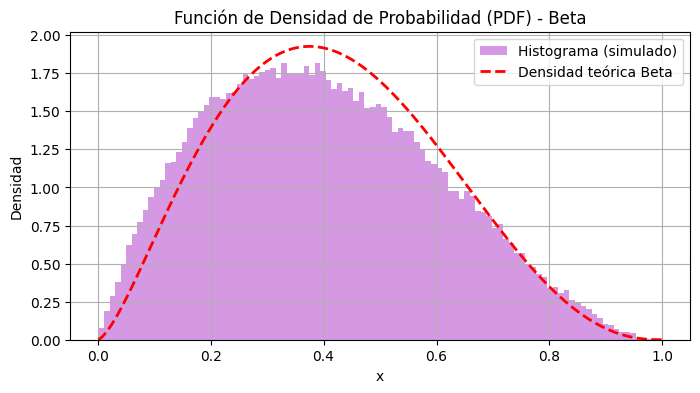

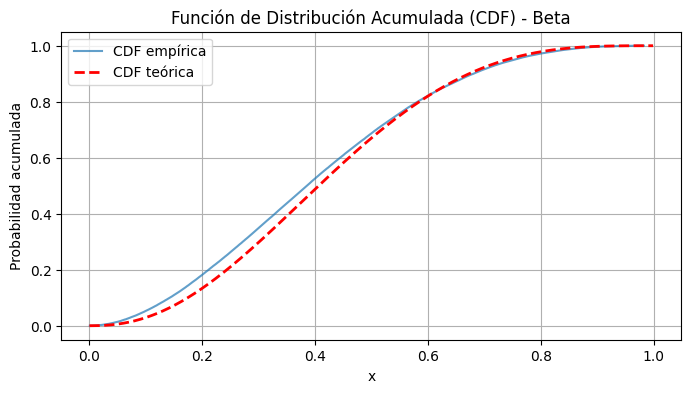

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log, sqrt, gamma
from scipy.special import betainc, beta as beta_func  # para PDF y CDF teóricas

# Parámetros de la distribución Beta
beta_alpha = 2.5  # forma α
beta_beta = 3.5   # forma β

# Teóricos
beta_media_teo = beta_alpha / (beta_alpha + beta_beta)
beta_var_teo = (beta_alpha * beta_beta) / ((beta_alpha + beta_beta)**2 * (beta_alpha + beta_beta + 1))
beta_std_teo = sqrt(beta_var_teo)

# Simulación por cociente de dos Gamma(α,1) y Gamma(β,1)
def simular_beta(n):
    muestras_beta = []
    for _ in range(n):
        # Gamma por método de suma de exponenciales
        G1 = sum(-log(random()) for _ in range(int(beta_alpha)))
        G2 = sum(-log(random()) for _ in range(int(beta_beta)))
        X = G1 / (G1 + G2)
        muestras_beta.append(X)
    return muestras_beta

# Número de simulaciones
k_beta = 100000

# Llamada a la función
datos_beta = simular_beta(k_beta)

# Estadísticas empíricas
beta_media_emp = np.mean(datos_beta)
beta_var_emp = np.var(datos_beta)
beta_std_emp = np.std(datos_beta)

# Imprimir resultados
print(f"Distribución Beta con α = {beta_alpha}, β = {beta_beta}, simulaciones: {k_beta}")
print(f"Media teórica: {beta_media_teo:.4f} | Empírica: {beta_media_emp:.4f}")
print(f"Varianza teórica: {beta_var_teo:.4f} | Empírica: {beta_var_emp:.4f}")
print(f"Desviación estándar teórica: {beta_std_teo:.4f} | Empírica: {beta_std_emp:.4f}")
print("")

# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_beta_vals = np.linspace(0.001, 0.999, 1000)
pdf_beta = (x_beta_vals**(beta_alpha - 1)) * ((1 - x_beta_vals)**(beta_beta - 1)) / beta_func(beta_alpha, beta_beta)

plt.figure(figsize=(8, 4))
plt.hist(datos_beta, bins=100, density=True, alpha=0.6, label='Histograma (simulado)', color='mediumorchid')
plt.plot(x_beta_vals, pdf_beta, 'r--', label='Densidad teórica Beta', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Beta')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_beta_ordenados = np.sort(datos_beta)
y_cdf_beta = np.arange(1, k_beta + 1) / k_beta

def cdf_beta(x, alpha, beta):
    return betainc(alpha, beta, x)

x_vals_beta = np.linspace(0.001, 0.999, 1000)
cdf_beta_teo = cdf_beta(x_vals_beta, beta_alpha, beta_beta)

plt.figure(figsize=(8, 4))
plt.plot(datos_beta_ordenados, y_cdf_beta, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_beta, cdf_beta_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Beta')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()


## Familia de Distribuciones de Pearson

### Definición:  
La familia de distribuciones de Pearson es una clasificación general de funciones de densidad de probabilidad (PDF) desarrollada por Karl Pearson para modelar diversas formas de distribuciones asimétricas o con curtosis variable. Está basada en una ecuación diferencial de primer orden que describe la forma de la función de densidad.

### Ecuación general de Pearson:

La función de densidad $f(x)$ satisface:

$$
\frac{1}{f(x)} \frac{df(x)}{dx} = -\frac{a_1 + a_2 x}{1 + b_1 x + b_2 x^2}
$$

Esta ecuación permite derivar distintos tipos de distribuciones (Tipo I a Tipo VII y Tipo 0), según los valores de los coeficientes $a_1, a_2, b_1, b_2 $.

---

### Clasificación de la familia de Pearson (resumen)

| Tipo    | Características                                                  | Soporte              | Ejemplos conocidos         |
|---------|------------------------------------------------------------------|-----------------------|----------------------------|
| Tipo 0  | Normal (caso particular)                                         | $\mathbb{R} $      | Normal                    |
| Tipo I  | Bounded (asimétrica)                                            | \( a < x < b \)       | Beta                      |
| Tipo II | Simétrica, acotada                                               | \( a < x < b \)       | Beta simétrica            |
| Tipo III| Solo un límite (positiva, asimétrica)                            | \( x > 0 \)           | Gamma, Chi-cuadrado       |
| Tipo IV | Generalizada, incluye t de Student                               | $\mathbb{R}$      | No tiene forma elemental  |
| Tipo V  | Cola pesada (unilateral)                                         | \( x > 0 \)           | Inversa Gamma             |
| Tipo VI | Dos parámetros, distribuciones pesadas                          | \( x > 0 \)           | Beta-prima                |
| Tipo VII| Simétrica con colas pesadas                                     | $\mathbb{R}$      | t de Student              |

---

### Momentos (cuando existen)

### Media:  
$$
\mu = \mathbb{E}[X]
$$
(varía según el tipo; en algunos casos no está definida)

### Varianza:  
$$
Var(X) = \mathbb{E}[X^2] - \mu^2
$$

### Desviación Estándar:
$$
\sigma = \sqrt{Var(X)}
$$

---

### Distribuciones conocidas como casos particulares

### Normal: Pearson Tipo 0  
### Beta: Pearson Tipo I  
### Gamma, Chi-cuadrado: Pearson Tipo III  
### Inversa Gamma: Pearson Tipo V  
### Distribución t de Student: Pearson Tipo VII

---

### Función de Distribución Acumulada (CDF)

No hay una forma cerrada general. Se calcula mediante la integración de la PDF específica para cada tipo.

$$
F(x) = \int_{-\infty}^{x} f(t) \, dt
$$

### Pseudocódigo general para simular distribuciones de la familia Pearson


Entrada:

    tipo de la distribución de Pearson (0 a VII)
    parámetros: según el tipo elegido

Procedimiento:

1. Según el tipo, seleccionar la distribución equivalente:
    
        Si tipo == 0:
            # Pearson Tipo 0: Normal
            Simular X ~ Normal(μ, σ²)

        Si tipo == I:
            # Pearson Tipo I: Beta generalizada
            Simular X ~ Beta(α, β), luego escalar al intervalo [a, b]

        Si tipo == II:
            # Pearson Tipo II: Beta simétrica
            Simular X ~ Beta(α = β), centrada en el intervalo

        Si tipo == III:
            # Pearson Tipo III: Gamma
            Simular X ~ Gamma(α, λ)

        Si tipo == IV:
            # Pearson Tipo IV: Requiere transformación de t-Student generalizada
            Usar métodos numéricos (poco común)

        Si tipo == V:
            # Pearson Tipo V: Inversa Gamma
            Simular G ~ Gamma(α, λ)
            Calcular X = 1 / G

        Si tipo == VI:
            # Pearson Tipo VI: Beta prima
            Simular X ~ Beta-prime(α, β)

        Si tipo == VII:
            # Pearson Tipo VII: t-Student generalizada
            Simular X ~ t-distribución con ν grados de libertad

2. Retornar X



Distribución Pearson tipo 1 con 100000 simulaciones
Media empírica: 0.4547
Varianza empírica: 0.0380
Desviación estándar empírica: 0.1948



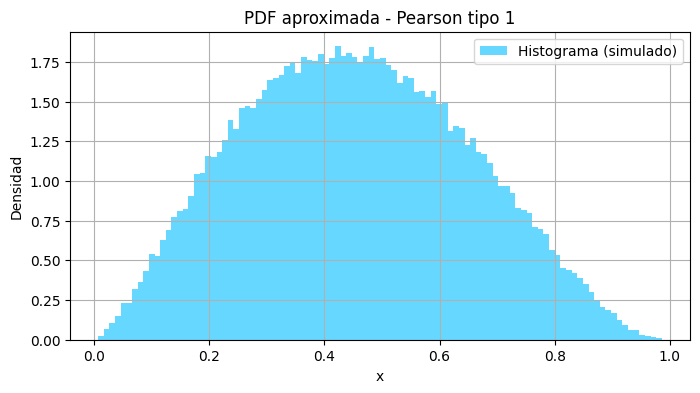

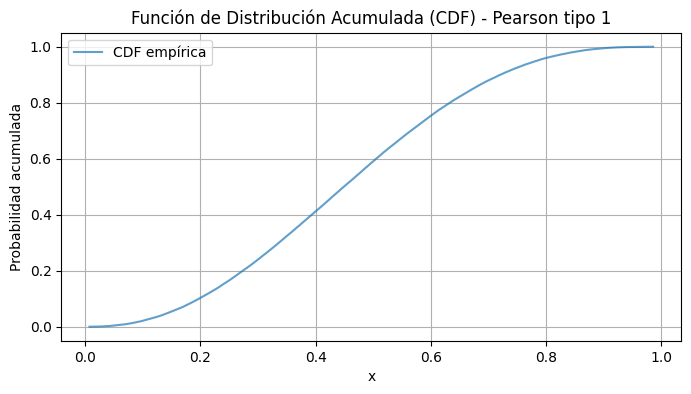

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta, gamma, t, invgamma, betaprime
from math import sqrt

# === Parámetros para tipo específico de Pearson ===
pearson_tipo = 1  # Cambia esto de 0 a 7 según el tipo
k_pearson = 100000  # número de simulaciones

# Parámetros por tipo
# Puedes ajustar estos parámetros por tipo si lo deseas
params_pearson = {
    0: {"mu": 0, "sigma": 1},                    # Tipo 0 → Normal
    1: {"a": 2.5, "b": 3.0},                     # Tipo I → Beta(α, β)
    3: {"alpha": 2.5, "scale": 1.0},             # Tipo III → Gamma(α)
    5: {"a": 3.0, "scale": 1.0},                 # Tipo V → Inversa Gamma
    6: {"a": 2.0, "b": 3.0},                     # Tipo VI → Beta-prime
    7: {"df": 5},                                # Tipo VII → t-Student
}

# === Simulación según el tipo de distribución Pearson ===
def simular_pearson_tipo(tipo, n):
    if tipo == 0:
        p = params_pearson[0]
        datos = norm.rvs(loc=p["mu"], scale=p["sigma"], size=n)
    elif tipo == 1:
        p = params_pearson[1]
        datos = beta.rvs(a=p["a"], b=p["b"], size=n)
    elif tipo == 3:
        p = params_pearson[3]
        datos = gamma.rvs(a=p["alpha"], scale=p["scale"], size=n)
    elif tipo == 5:
        p = params_pearson[5]
        datos = invgamma.rvs(a=p["a"], scale=p["scale"], size=n)
    elif tipo == 6:
        p = params_pearson[6]
        datos = betaprime.rvs(a=p["a"], b=p["b"], size=n)
    elif tipo == 7:
        p = params_pearson[7]
        datos = t.rvs(df=p["df"], size=n)
    else:
        raise ValueError("Tipo de Pearson no implementado (usa 0, 1, 3, 5, 6 o 7)")
    return datos

# === Simulación y estadísticas ===
datos_pearson = simular_pearson_tipo(pearson_tipo, k_pearson)

media_pearson_emp = np.mean(datos_pearson)
var_pearson_emp = np.var(datos_pearson)
std_pearson_emp = np.std(datos_pearson)

# === Imprimir resultados ===
print(f"Distribución Pearson tipo {pearson_tipo} con {k_pearson} simulaciones")
print(f"Media empírica: {media_pearson_emp:.4f}")
print(f"Varianza empírica: {var_pearson_emp:.4f}")
print(f"Desviación estándar empírica: {std_pearson_emp:.4f}")
print("")

# === GRAFICAR HISTOGRAMA ===
x_pearson = np.linspace(np.percentile(datos_pearson, 0.5), np.percentile(datos_pearson, 99.5), 1000)

plt.figure(figsize=(8, 4))
plt.hist(datos_pearson, bins=100, density=True, alpha=0.6, label='Histograma (simulado)', color='deepskyblue')
plt.title(f'PDF aproximada - Pearson tipo {pearson_tipo}')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()
plt.show()

# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_pearson_ordenados = np.sort(datos_pearson)
y_cdf_pearson = np.arange(1, k_pearson + 1) / k_pearson

plt.figure(figsize=(8, 4))
plt.plot(datos_pearson_ordenados, y_cdf_pearson, label='CDF empírica', alpha=0.7)
plt.title(f'Función de Distribución Acumulada (CDF) - Pearson tipo {pearson_tipo}')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.legend()
plt.show()


## Distribución Log-logística

### Definición:
La distribución log-logística es una distribución continua que se utiliza principalmente para modelar tiempos de falla con comportamiento de tasa de riesgo creciente y decreciente. Es análoga a la log-normal, pero con funciones más simples.

### Notación:
$$
X \sim \text{LogLogística}(\alpha, \beta)
$$
donde:

- $\alpha > 0$: parámetro de escala  
- $\beta > 0$: parámetro de forma

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\dfrac{(\beta / \alpha) (x / \alpha)^{\beta - 1}}{[1 + (x / \alpha)^\beta ]^2}, & x > 0 \\
0, & x \leq 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
\dfrac{1}{1 + (x / \alpha)^{-\beta}}, & x > 0 \\
0, & x \leq 0
\end{cases}
$$

### Media (si $\beta > 1$)

$$
\mathbb{E}[X] = \alpha \dfrac{\pi / \beta}{\sin(\pi / \beta)}, \quad \text{solo si } \beta > 1
$$

### Varianza (si $\beta > 2$)

$$
\text{Var}(X) = \alpha^2 \left[ \dfrac{2\pi / \beta}{\sin(2\pi / \beta)} - \left( \dfrac{\pi / \beta}{\sin(\pi / \beta)} \right)^2 \right], \quad \text{solo si } \beta > 2
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)}
$$

###Pseudocódigo para simular una variable Log-logística mediante Trnsformada Inversa $(\alpha, \beta)$


Entradas:

    α: parámetro de escala (α > 0)
    β: parámetro de forma (β > 0)

Procedimiento:

1. Generar $U \sim Uniforme(0, 1)$
2. Calcular:
$$X = \alpha * (U / (1 - U))^{1 / \beta}$$
3. Retornar $X$



Distribución Log-logística con α = 2.0, β = 3.0, simulaciones: 100000
Media teórica: 2.4184 | Empírica: 2.4171
Varianza teórica: 3.8249 | Empírica: 4.2152
Desviación estándar teórica: 1.9557 | Empírica: 2.0531



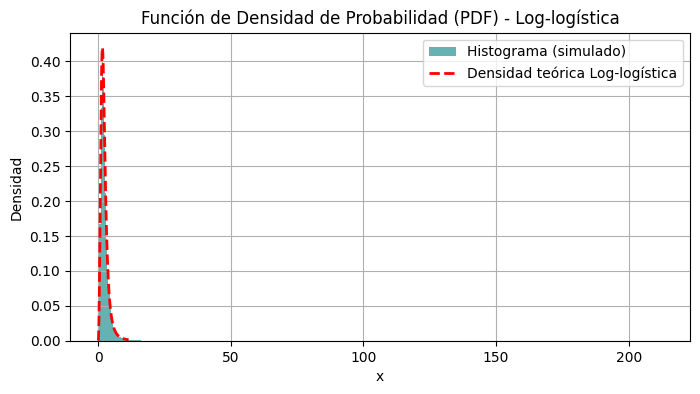

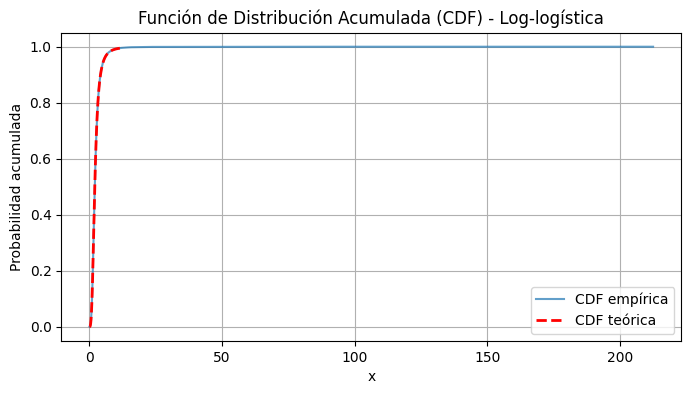

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import pi, sin, sqrt, log

# Parámetros de la distribución log-logística
ll_alpha = 2.0   # parámetro de escala α
ll_beta = 3.0    # parámetro de forma β

# Cálculos teóricos (si existen)
if ll_beta > 1:
    ll_media_teo = ll_alpha * (pi / ll_beta) / sin(pi / ll_beta)
else:
    ll_media_teo = np.nan  # no existe

if ll_beta > 2:
    ll_var_teo = ll_alpha**2 * ((2 * pi / ll_beta) / sin(2 * pi / ll_beta) - ((pi / ll_beta) / sin(pi / ll_beta))**2)
    ll_std_teo = sqrt(ll_var_teo)
else:
    ll_var_teo = np.nan
    ll_std_teo = np.nan

# Simulación por transformada inversa
def simular_loglogistica(n):
    lista_ll = []
    for _ in range(n):
        U = random()
        x_ll = ll_alpha * (U / (1 - U))**(1 / ll_beta)
        lista_ll.append(x_ll)
    return lista_ll

# Número de simulaciones
k_ll = 100000

# Llamada a la función
datos_ll = simular_loglogistica(k_ll)

# Estadísticas empíricas
ll_media_emp = np.mean(datos_ll)
ll_var_emp = np.var(datos_ll)
ll_std_emp = np.std(datos_ll)

# Imprimir resultados
print(f"Distribución Log-logística con α = {ll_alpha}, β = {ll_beta}, simulaciones: {k_ll}")
print(f"Media teórica: {ll_media_teo:.4f} | Empírica: {ll_media_emp:.4f}")
print(f"Varianza teórica: {ll_var_teo:.4f} | Empírica: {ll_var_emp:.4f}")
print(f"Desviación estándar teórica: {ll_std_teo:.4f} | Empírica: {ll_std_emp:.4f}")
print("")

# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_ll_vals = np.linspace(0.001, np.percentile(datos_ll, 99.5), 1000)
pdf_ll = (ll_beta / ll_alpha) * (x_ll_vals / ll_alpha)**(ll_beta - 1) / (1 + (x_ll_vals / ll_alpha)**ll_beta)**2

plt.figure(figsize=(8, 4))
plt.hist(datos_ll, bins=500, density=True, alpha=0.6, label='Histograma (simulado)', color='teal')
plt.plot(x_ll_vals, pdf_ll, 'r--', label='Densidad teórica Log-logística', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Log-logística')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_ll_ordenados = np.sort(datos_ll)
y_cdf_ll = np.arange(1, k_ll + 1) / k_ll

def cdf_loglogistica(x, alpha, beta):
    return 1 / (1 + (x / alpha)**(-beta))

x_vals_ll = np.linspace(0.001, np.percentile(datos_ll, 99.5), 1000)
cdf_teo_ll = cdf_loglogistica(x_vals_ll, ll_alpha, ll_beta)

plt.figure(figsize=(8, 4))
plt.plot(datos_ll_ordenados, y_cdf_ll, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_ll, cdf_teo_ll, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Log-logística')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución de Johnson

### Definición:}
La familia de distribuciones de Johnson fue introducida por N. L. Johnson (1949) para transformar variables normales estándar en variables con diferentes formas de distribución. Se basa en una transformación de una variable normal $Z \sim \mathcal{N}(0, 1)$ para generar una variable $X$.

### Notación general:
$$
Z = \gamma + \delta \cdot f\left( \frac{X - \xi}{\lambda} \right)
$$
donde:
- $\gamma \in \mathbb{R}$: parámetro de ubicación  
- $\delta > 0$: parámetro de forma  
- $\xi \in \mathbb{R}$: parámetro de desplazamiento (shift)  
- $\lambda > 0$: parámetro de escala  
- $f(\cdot)$: función que define la familia (log, logit o identidad)

---

### Tipos de distribuciones Johnson

| Tipo  | Nombre             | Función \( f \)             | Soporte de \( X \)          |
|-------|--------------------|-----------------------------|-----------------------------|
| SL    | Johnson Lognormal  | $f(t) = \ln(t)$         | $X > \xi $               
|
| SB    | Johnson Bounded    | $f(t) = \ln \left( \frac{t}{1 - t} \right)$ | $\xi < X < \xi + \lambda$ |
| SU    | Johnson Unbounded  | $f(t) = \sinh^{-1}(t)$  | $X \in \mathbb{R}$      |

---

### Función de Densidad de Probabilidad (PDF) - general

$$
f_X(x) = \frac{\delta}{\lambda \sqrt{2\pi}} \cdot \frac{1}{\sqrt{1 + [f((x - \xi)/\lambda)]^2}} \cdot \exp\left( -\frac{1}{2} \left[\gamma + \delta \cdot f\left( \frac{x - \xi}{\lambda} \right)\right]^2 \right)
$$

El término exacto varía según la familia (SL, SB, SU), ya que cambia la forma de $f$.

---

### Función de Distribución Acumulada (CDF)

$$
F(x) = \Phi \left( \gamma + \delta \cdot f\left( \frac{x - \xi}{\lambda} \right) \right)
$$

donde $\Phi(\cdot)$ es la función de distribución acumulada de la normal estándar.

---

### Momentos (media, varianza, etc.)

No tienen una forma cerrada general simple para todas las familias.  
En la práctica, se usan **expresiones numéricas o simulaciones** para calcular la media y la varianza.

Sin embargo, si $Z = \gamma + \delta f\left( \frac{X - \xi}{\lambda} \right) \sim \mathcal{N}(0, 1)$, entonces se puede expresar $X$ como función inversa de $Z$, y calcular los momentos mediante:

$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} X(z) \cdot \phi(z) \, dz
\quad\text{y}\quad
\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
$$

donde $\phi(z)$ es la densidad de la normal estándar.

---

### Uso

La familia Johnson es muy versátil para modelar datos que no siguen una distribución común, especialmente en:

- Ingeniería de confiabilidad
- Finanzas (log-return bounded, tasas)
- Modelado de fenómenos con asimetría y curtosis

### Pseudocódigo para simular una variable Johnson


Entradas:

    tipo: "SL", "SB", "SU"
    γ (gamma): parámetro de ubicación
    δ (delta): parámetro de forma (δ > 0)
    ξ (xi): parámetro de desplazamiento
    λ (lambda): parámetro de escala (λ > 0)

Procedimiento:

1. Generar $Z \sim Normal(0, 1)$

2. Según el tipo, transformar $Z$:

       Si tipo == "SL":  # Log-normal (Johnson SL)
           X = ξ + λ * exp((Z - γ) / δ)

       Si tipo == "SB":  # Acotada (Johnson SB)
           T = exp((Z - γ) / δ)
           X = ξ + λ * T / (1 + T)

       Si tipo == "SU":  # No acotada (Johnson SU)
           X = ξ + λ * sinh((Z - γ) / δ)

3. Retornar $X$



Distribución Johnson tipo SU con 100000 simulaciones
Media empírica: 1.9995
Varianza empírica: 3.2427
Desviación estándar empírica: 1.8007



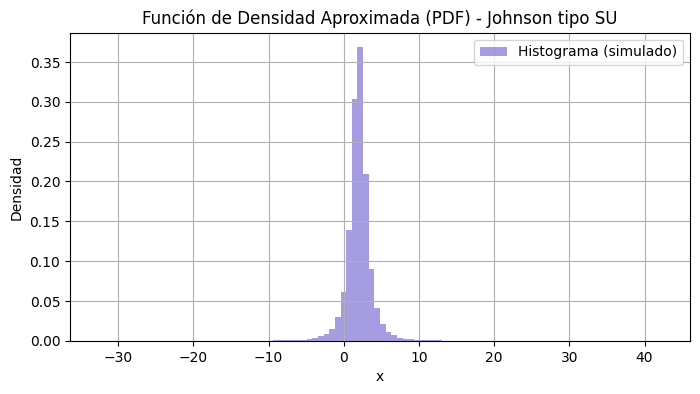

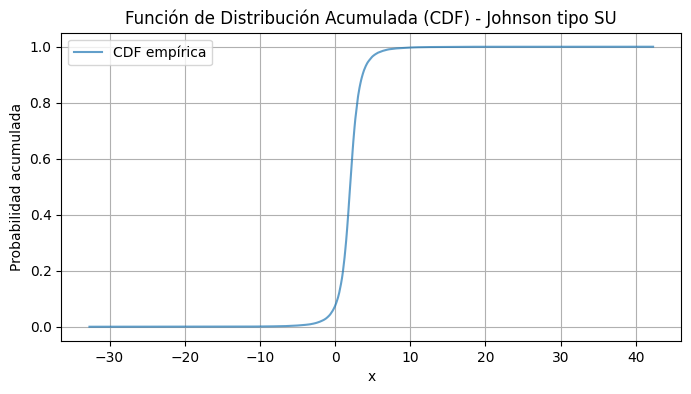

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sinh
from random import gauss

# Parámetros generales de la familia Johnson
john_tipo = "SU"   # "SL", "SB" o "SU"
john_gamma = 0.0   # γ (location)
john_delta = 1.0   # δ (shape)
john_xi = 2.0      # ξ (shift)
john_lambda = 1.0  # λ (scale)

# Simulación de variable Johnson
def simular_johnson(n, tipo):
    lista_john = []
    for _ in range(n):
        Z = gauss(0, 1)
        if tipo == "SL":  # Johnson lognormal
            x = john_xi + john_lambda * exp((Z - john_gamma) / john_delta)
        elif tipo == "SB":  # Johnson bounded
            t = exp((Z - john_gamma) / john_delta)
            x = john_xi + john_lambda * t / (1 + t)
        elif tipo == "SU":  # Johnson unbounded
            x = john_xi + john_lambda * sinh((Z - john_gamma) / john_delta)
        else:
            raise ValueError("Tipo inválido. Usa 'SL', 'SB' o 'SU'.")
        lista_john.append(x)
    return lista_john

# Número de simulaciones
k_john = 100000

# Llamada a la función
datos_john = simular_johnson(k_john, john_tipo)

# Estadísticas empíricas
john_media_emp = np.mean(datos_john)
john_var_emp = np.var(datos_john)
john_std_emp = np.std(datos_john)

# No hay fórmula cerrada general para media/varianza teórica
john_media_teo = np.nan
john_var_teo = np.nan
john_std_teo = np.nan

# Imprimir resultados
print(f"Distribución Johnson tipo {john_tipo} con {k_john} simulaciones")
print(f"Media empírica: {john_media_emp:.4f}")
print(f"Varianza empírica: {john_var_emp:.4f}")
print(f"Desviación estándar empírica: {john_std_emp:.4f}")
print("")

# === GRAFICAR HISTOGRAMA ===
x_john = np.linspace(np.percentile(datos_john, 0.5), np.percentile(datos_john, 99.5), 1000)

plt.figure(figsize=(8, 4))
plt.hist(datos_john, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='slateblue')
plt.title(f'Función de Densidad Aproximada (PDF) - Johnson tipo {john_tipo}')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_john_ordenados = np.sort(datos_john)
y_cdf_john = np.arange(1, k_john + 1) / k_john

plt.figure(figsize=(8, 4))
plt.plot(datos_john_ordenados, y_cdf_john, label='CDF empírica', alpha=0.7)
plt.title(f'Función de Distribución Acumulada (CDF) - Johnson tipo {john_tipo}')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()


# Distribuciones Continuas

## Distribución Uniforme Discreta

### Definición:
Una variable aleatoria $X$ sigue una distribución uniforme discreta si todos los valores enteros dentro de un intervalo finito tienen la misma probabilidad de ocurrencia.

### Notación:
$$
X \sim \mathcal{U}\{a, b\}
\quad \text{donde } a, b \in \mathbb{Z}, \ a \leq b
$$

---

### Función de Masa de Probabilidad (PMF)

$$
P(X = x) =
\begin{cases}
\frac{1}{b - a + 1}, & x \in \{a, a+1, \dots, b\} \\
0, & \text{en otro caso}
\end{cases}
$$

---

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{\lfloor x \rfloor - a + 1}{b - a + 1}, & a \leq x < b \\
1, & x \geq b
\end{cases}
$$

---

### Media

$$
\mathbb{E}[X] = \frac{a + b}{2}
$$

---

### Varianza

$$
\text{Var}(X) = \frac{(b - a + 1)^2 - 1}{12}
$$

---

### Desviación Estándar

$$
\sigma = \sqrt{\text{Var}(X)} = \sqrt{ \frac{(b - a + 1)^2 - 1}{12} }
$$

### Pseudocódigo para simular una variable Uniforme Discreta $\mathcal{U}\{a, b\}$


Entradas:

    a: límite inferior (entero)
    b: límite superior (entero), con b ≥ a

Procedimiento:

1. Generar $U \sim Uniforme(0, 1)$
2. Calcular:
$$X = a + floor( (b - a + 1) * U )$$
3. Retornar $X$


Distribución Uniforme Discreta en [2, 7] con 100000 simulaciones
Media teórica: 4.5000 | Empírica: 4.5002
Varianza teórica: 2.9167 | Empírica: 2.9181
Desviación estándar teórica: 1.7078 | Empírica: 1.7082



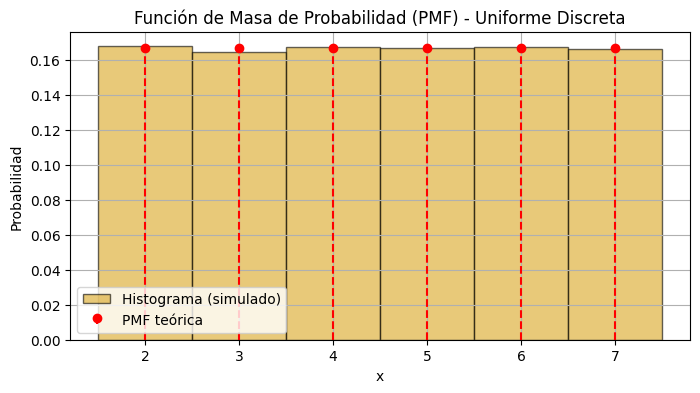

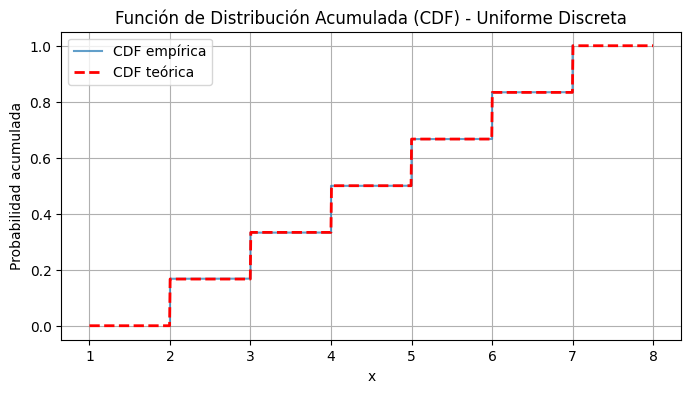

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import floor

# Parámetros de la distribución uniforme discreta
ud_a = 2
ud_b = 7

# Teóricos
ud_media_teo = (ud_a + ud_b) / 2
ud_var_teo = ((ud_b - ud_a + 1)**2 - 1) / 12
ud_std_teo = np.sqrt(ud_var_teo)

# Simulación por transformada inversa
def simular_uniforme_discreta(n):
    lista_ud = []
    for _ in range(n):
        U = random()
        x = ud_a + floor((ud_b - ud_a + 1) * U)
        lista_ud.append(x)
    return lista_ud

# Número de simulaciones
k_ud = 100000

# Llamada a la función
datos_ud = simular_uniforme_discreta(k_ud)

# Estadísticas empíricas
ud_media_emp = np.mean(datos_ud)
ud_var_emp = np.var(datos_ud)
ud_std_emp = np.std(datos_ud)

# Imprimir resultados
print(f"Distribución Uniforme Discreta en [{ud_a}, {ud_b}] con {k_ud} simulaciones")
print(f"Media teórica: {ud_media_teo:.4f} | Empírica: {ud_media_emp:.4f}")
print(f"Varianza teórica: {ud_var_teo:.4f} | Empírica: {ud_var_emp:.4f}")
print(f"Desviación estándar teórica: {ud_std_teo:.4f} | Empírica: {ud_std_emp:.4f}")
print("")

# === GRAFICAR HISTOGRAMA + PMF TEÓRICA ===
valores_discretos = np.arange(ud_a, ud_b + 1)
pmf_teorica = np.full_like(valores_discretos, 1 / (ud_b - ud_a + 1), dtype=np.float64)

plt.figure(figsize=(8, 4))
plt.hist(datos_ud, bins=np.arange(ud_a - 0.5, ud_b + 1.5, 1), density=True,
         alpha=0.6, label="Histograma (simulado)", color='goldenrod', edgecolor='black')
plt.stem(valores_discretos, pmf_teorica, linefmt='r--', markerfmt='ro', basefmt=" ", label='PMF teórica')
plt.title('Función de Masa de Probabilidad (PMF) - Uniforme Discreta')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.xticks(valores_discretos)
plt.legend()
plt.grid(True)
plt.show()

# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_ud_ordenados = np.sort(datos_ud)
y_cdf_ud = np.arange(1, k_ud + 1) / k_ud

# CDF teórica escalonada
def cdf_uniforme_discreta(x, a, b):
    return np.piecewise(x,
        [x < a, (x >= a) & (x <= b), x > b],
        [0, lambda x: (np.floor(x) - a + 1) / (b - a + 1), 1])

x_vals_ud = np.linspace(ud_a - 1, ud_b + 1, 1000)
cdf_teo_ud = cdf_uniforme_discreta(x_vals_ud, ud_a, ud_b)

plt.figure(figsize=(8, 4))
plt.plot(datos_ud_ordenados, y_cdf_ud, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_ud, cdf_teo_ud, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Uniforme Discreta')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()
